In [219]:
library(tidyverse)
library(tidymodels)
library("GGally")
library(stringr)
library(repr)

# Proposal Group 17: Title....

Lua Presidio, Daniel ..., Michelle ...

Data credit: 

## Introdution

somethign something


## Preliminary exploratory data analysis

In [220]:
# url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00368/"
# download.file(url, "Facebook_metrics.zip")
# unzip(fb_zip)
# fb_data <- read_csv("dataset_Facebook.csv") 
# fb_data
# col_names_proper = c("Page_total_likes", "Type", "Category", "Post_month", "Post_weekday", "Post_hour", "Paid", 
#                      "Lifetime_Post_Total_Reach", "Lifetime_Post_Total_Impressions", "Lifetime_Engaged_Users", 
#                      "Lifetime_Post_Consumers", "Lifetime_Post_Consumptions", "Lifetime_Post_Impressions_by_people_who_have_liked_your_Page", 
#                      "Lifetime_Post_reach_by_people_who_like_your_Page", "Lifetime_People_who_have_liked_Page_and_engaged_with_post",
#                      "comment","like", "share", "Total_Interactions")
# # full data
# temp <- tempfile()
# download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)
# fb_data <- read_csv2(unz(temp, "dataset_Facebook.csv"))
# colnames(fb_data) <- col_names_proper
# unlink(temp)
# fb_data

# # training data
# set.seed(10)
# fb_data_split <- initial_split(fb_data, prop = 0.70, strata = Total_Interactions)
# fb_data_training <- training(fb_data_split)
# fb_data_testing <- testing(fb_data_split)

fire_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", skip = 1)
nrow(fire_data)


fire_data2  <- fire_data %>%
    mutate(seq = 1:nrow(fire_data)) %>%
    mutate(region = case_when(seq < 123 ~ "Bejaia",
                              TRUE ~ "Sidi-Bel Abbes"))

fire_data_fix <- fire_data2 %>%
    filter(seq == 168) %>%
    separate(col = "DC", into = c("DC", "new"), sep = " ") %>%
    mutate(Classes = FWI)%>%
    mutate(FWI = BUI) %>%
    mutate(BUI = ISI) %>%
    mutate(ISI = new) %>%
    select(-new)
    

fire_data2 <- fire_data2[-c(123,124, 168), ] 
nrow(fire_data2)

fire_data_comp <- rbind(fire_data2, fire_data_fix)

numerics <- c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI")

fire_data_comp <- select(fire_data_comp, -seq) %>%
    mutate(seq = 1:nrow(fire_data_comp)) %>%
    type.convert(as.is = TRUE)
fire_data_comp
    
set.seed(10)
fire_data_split <- initial_split(fire_data_comp, prop = 0.75, strata = Classes)
fire_data_training <- training(fire_data_split)
fire_data_testing <- testing(fire_data_split)
    
    
    

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


[1] 246

[1] 243

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,seq
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,3
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,4
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,5
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,Bejaia,6
7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia,7
8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia,8
9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,Bejaia,9


In [221]:
# finding the mean of post interactions, engagement, impressions, reach for paid and unpaid posts, etc., 
# and number of observations for each status of Paid vs unpaid, and post type
# subject to change based on specifics of proposal question
# fb_data_3 <- fb_data_training %>%
#     mutate(Paid = factor(Paid)) %>%
#     group_by(Post_month, Post_weekday, Post_hour, Type) %>%
#     summarize(number_of_observations = n(),
#               Total_Interactions_avg = mean(Total_Interactions),
#               Lifetime_post_reach_avg = mean()
# fb_data_3



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

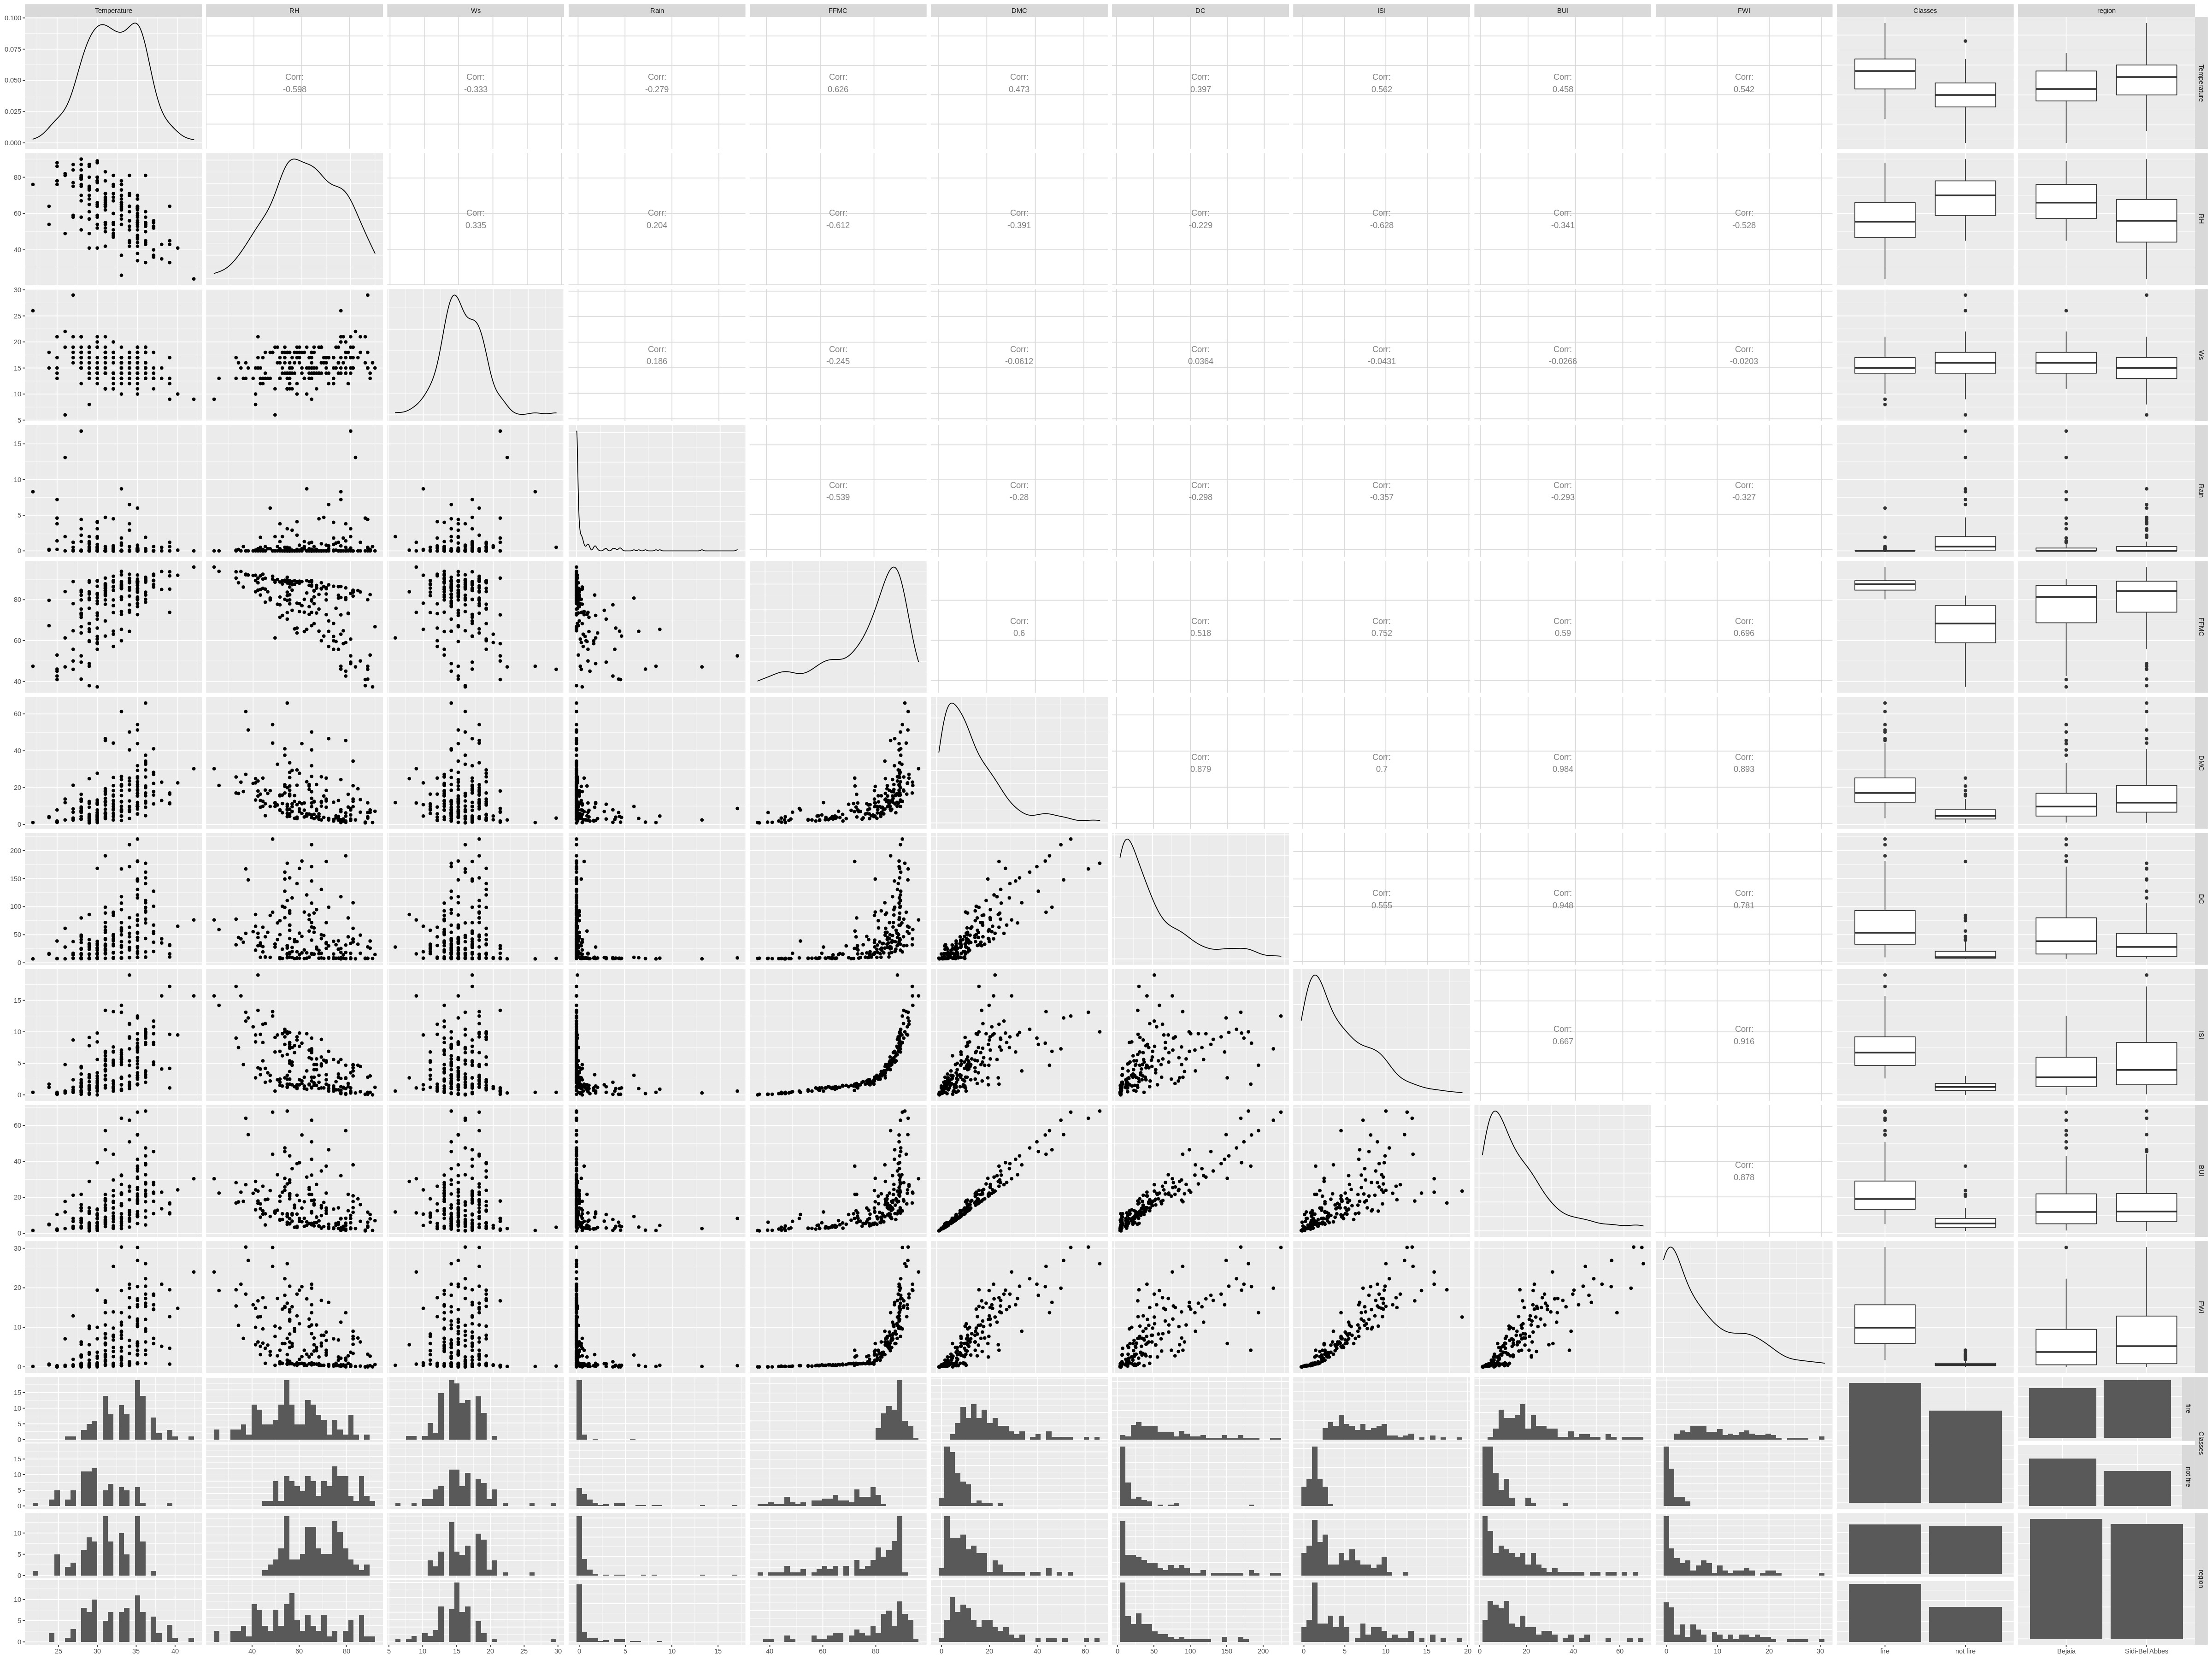

In [222]:
# #preliminary visualization of each of the means based on Paid status and Type
# options(repr.plot.height = 30, repr.plot.width = 40)
# fb_data_training %>%
#     ggplot(aes(x = Post_hour, y= Total_Interactions)) +
#     geom_point() +
#     facet_wrap(~ Post_weekday, scales = "free_y", ncol = 3)+
#     xlab("Hour") +
#     ylab("Number of Interactions") +
#     theme(text = element_text(size = 25))

fire_data_training %>%
    select(-day, -month, -year, -seq) %>%
    ggpairs(axisLabels = "show")

In [223]:
## Methods